In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
df = pd.read_csv("Real_estate.csv")
df.head()


,ID,Location_Score,Num_Bedrooms,Num_Floors,Square_Feet,Year_Built,Price
0,0,9.240269,1,2,189.601062,1916,407318.841443
1,1,2.475101,5,2,185.661159,2014,764976.300349
2,2,4.825004,1,1,123.612223,1998,442615.716180
3,3,9.362671,4,2,98.947784,1944,532150.823762
4,4,7.256272,1,2,84.873465,1997,479876.364639


In [20]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              500 non-null    int64  
 1   Location_Score  500 non-null    float64
 2   Num_Bedrooms    500 non-null    int64  
 3   Num_Floors      500 non-null    int64  
 4   Square_Feet     500 non-null    float64
 5   Year_Built      500 non-null    int64  
 6   Price           500 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


Index(['ID', 'Location_Score', 'Num_Bedrooms', 'Num_Floors', 'Square_Feet',
       'Year_Built', 'Price'],
      dtype='object')

In [21]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [24]:
y_pred = model.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(37054.29595824562,
 1956101349.450578,
 np.float64(44227.834555295354),
 0.8609750813638168)

In [26]:
# Basic structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              500 non-null    int64  
 1   Location_Score  500 non-null    float64
 2   Num_Bedrooms    500 non-null    int64  
 3   Num_Floors      500 non-null    int64  
 4   Square_Feet     500 non-null    float64
 5   Year_Built      500 non-null    int64  
 6   Price           500 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


In [27]:
# Statistical summary
df.describe()

,ID,Location_Score,Num_Bedrooms,Num_Floors,Square_Feet,Year_Built,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,5.164410,2.958000,1.964000,174.640428,1957.604000,582209.629529
std,144.481833,2.853489,1.440968,0.802491,74.672102,35.491781,122273.390345
min,0.000000,0.004428,1.000000,1.000000,51.265396,1900.000000,276892.470136
25%,124.750000,2.760650,2.000000,1.000000,110.319923,1926.000000,503080.344140
50%,249.500000,5.206518,3.000000,2.000000,178.290937,1959.000000,574724.113347
75%,374.250000,7.732933,4.000000,3.000000,239.031220,1988.000000,665942.301274
max,499.000000,9.995439,5.000000,3.000000,298.241199,2022.000000,960678.274291


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 37054.29595824562
Mean Squared Error (MSE): 1956101349.450578
Root Mean Squared Error (RMSE): 44227.834555295354
R² Score: 0.8609750813638168


In [29]:
predictions_df = pd.DataFrame({
    "Actual_Price": y_test.values,
    "Predicted_Price": y_pred
})

predictions_df.to_csv("predictions.csv", index=False)

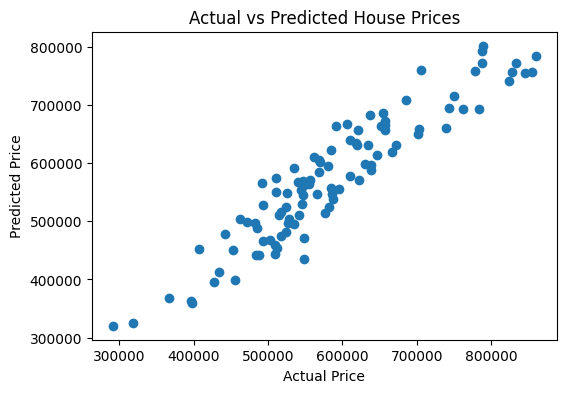

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()